Nessa prática vamos realizar um agrupamento hierárquico usando o algoritmo  **complete-linkage**. Para isso, vamos usar uma base de dados sobre consumidores de um shopping.

Esses dados contém os seguintes campos:

* **CustomerID**: ID do cliente
* **Genre**: gênero
* **Age**: idade
* **Annual Income (k$)**: renda anual
* **Spending Score (1-100)**: pontuação de gastos - consumidores que gastam mais tem pontuação maior

Este exercício é baseado no exemplo retirado do artigo [Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) de Usman Malik, StackAbuse.

Os [dados](https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv) foram obtidos do artigo acima e também estão disponíveis neste [link](https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (15,10)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
#vamos utilizar as colunas Annual Income e Spending Score para obter os dados em espaço bidimensional
df_2d = df[['Annual Income (k$)','Spending Score (1-100)']]

#Agora, vamos visualizar o dendograma usando o complete-linkage (parâmetro **method='complete'**), que vai nos indicar o número de grupos da base de dados.

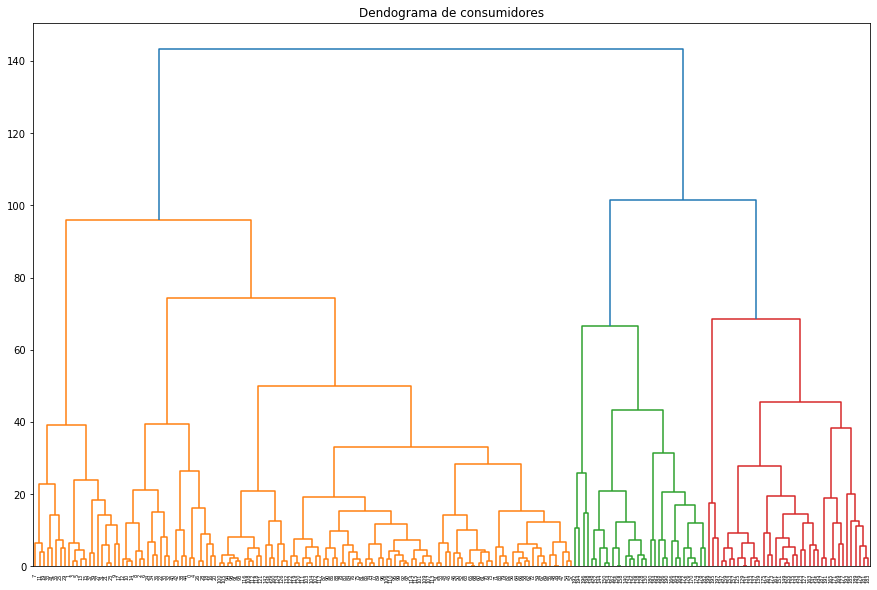

In [14]:
plt.title('Dendograma de consumidores')
dendograma = shc.dendrogram(shc.linkage(df_2d, method='complete'))

Observando o dendograma, as regiões com maior distância entre as linhas verticais contêm entre 2 e 7 grupos. Vamos usar o complete-linkage com 5 grupos para predizer a quais grupos as amostras pertencem. Vamos selecionar o número de grupos (**n_clusters**), a medida de similaridade (**affinity**) usada é a distância euclidiana e o algoritmo (**linkage**) é o complete-linkage.

  Como resultado, os valores de 0 a 4 indicam os grupos aos quais os objetos da base pertencem.

In [15]:
n_grupos = 5
grupos = AgglomerativeClustering(n_clusters=n_grupos, affinity='euclidean', linkage='complete')
grupos.fit_predict(df_2d)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

A seguir, vamos ver o resultado do processo de agrupamento usando um gráfico de dispersão e pintando os objetos dos grupos com cores diferentes.

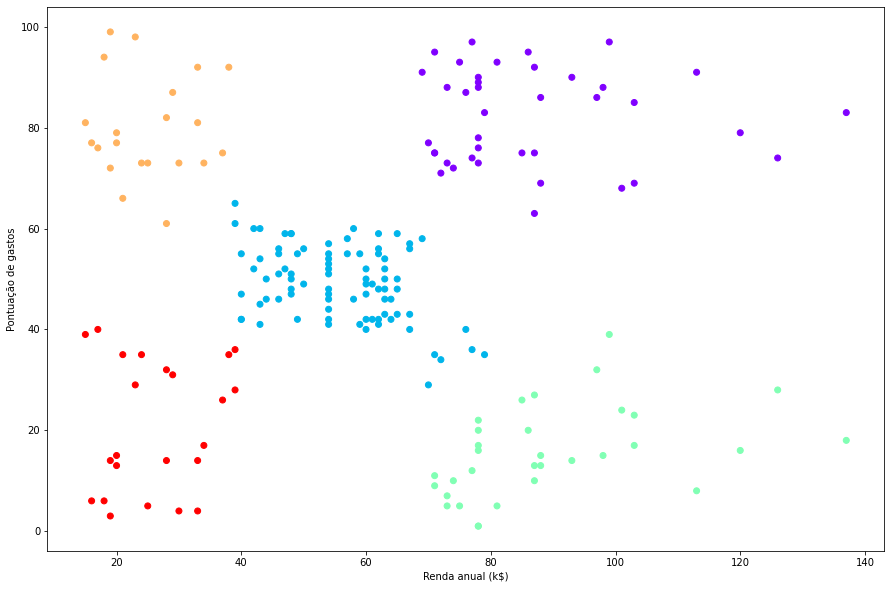

In [16]:
plt.scatter(df_2d['Annual Income (k$)'],df_2d['Spending Score (1-100)'],c=grupos.labels_,cmap='rainbow')
plt.xlabel('Renda anual (k$)')
plt.ylabel('Pontuação de gastos')
plt.show()

Os pontos parecem se ajustar bem aos cinco grupos. Os grupos vermelho e azul estão mais próximos, e talvez pudessem ser um grupo só. Os pontos do lado direito abaixo (verdes) representam consumidores com alto salário, mas que gastamm pouco no shopping. Já os consumidores com alto salário e que gastam muito estão na parte superior direita (roxos). Em azul, no centro do gráfico, estão os consumidores com renda e gastos médios, e assim por diante. 

O modelo gerado pelo agrupamento pode ser usado, por exemplo, para direcionar promoções específicas para esses perfis de consumidores.

Para trazer mais informações para o gráfico de dispersão, podemos adicionar rótulos para os pontos. O código abaixo faz isso.

* Usamos a função **subplots()**, que retorna a figura e os eixos do gráfico. 
* No eixo do gráfico, criamos o gráfico de dispersão
* Iteramos sobre o dataframe original para pegar o gênero dos consumidores
* Para não poluir a visualização, só vamos incluir rótulos para o genêro somente com F (feminino) e M (masculino) .
* A função **annotate** adiciona o rótulo do valor passado como primeiro parâmetro (**F ou M**) no ponto passado como segundo parâmetro: **df_2d['Annual Income (k$)'], df_2d['Spending Score (1-100)']**.

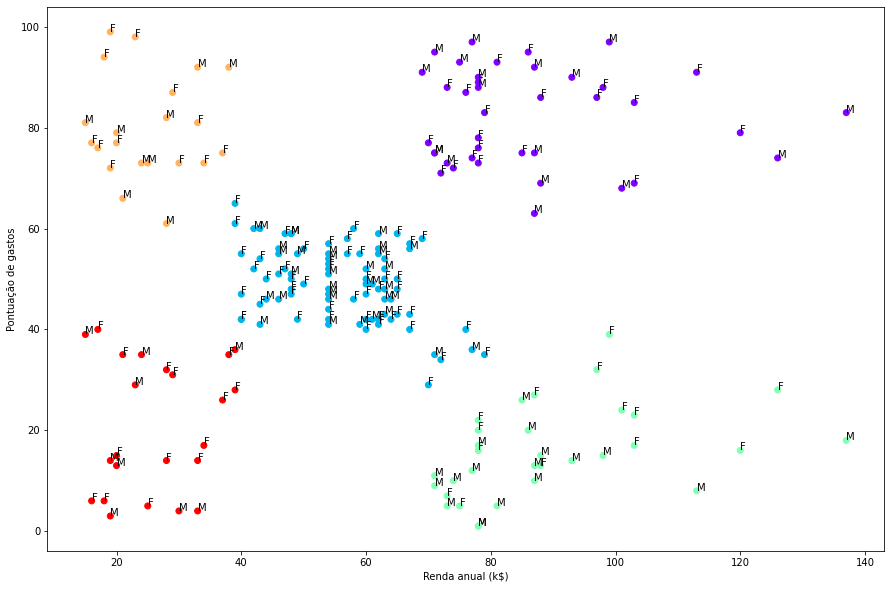

In [17]:
fig, eixo = plt.subplots()

plt.scatter(df_2d['Annual Income (k$)'],df_2d['Spending Score (1-100)'],c=grupos.labels_,cmap='rainbow')
eixo.set_xlabel('Renda anual (k$)')
eixo.set_ylabel('Pontuação de gastos')

# iterando sobre o dataframe original, que tem o gênero dos consumidores
for i, texto in enumerate(df['Genre']):
    if texto == 'Female':
        eixo.annotate('F', (df.iloc[i]['Annual Income (k$)'],df.iloc[i]['Spending Score (1-100)']))
    else:
        eixo.annotate('M', (df.iloc[i]['Annual Income (k$)'],df.iloc[i]['Spending Score (1-100)']))

plt.show()